# **Examples of how to use AI for coding**

# 1.	Filter data using 4th order Butterworth filter with 6hz cut off frequency and 100hz sampling rate

In [12]:
# prompt: Filter data using 4th order Butterworth filter with 6hz cut off frequency and 100hz sampling rate

from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=4):
  nyq = 0.5 * fs
  normal_cutoff = cutoff / nyq
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  y = filtfilt(b, a, data)
  return y

# Assuming 'data' is your time series data
#filtered_data = butter_lowpass_filter(data, 6, 100, order=4)


# 2. Create some artificial data to filter with the lowpass filter created above and plot both data. Data should be 500 samples and should resemble joint angles.

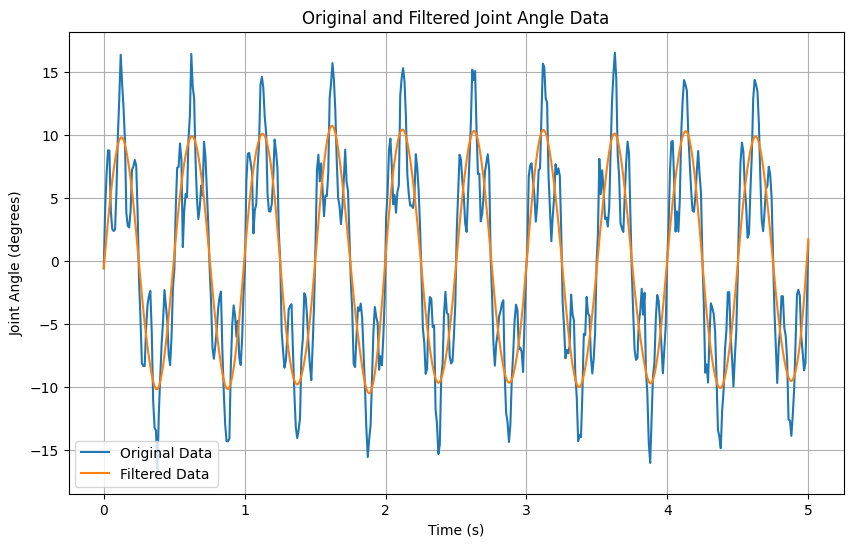

In [30]:
# prompt: Create some artificial data to filter with the lowpass filter created above and plot both data. Data should be 500 samples and should resemble joint angles

import numpy as np
import matplotlib.pyplot as plt

# Create artificial data resembling joint angles
time = np.linspace(0, 5, 500)
data = 10 * np.sin(2 * np.pi * 2 * time) + 5 * np.sin(2 * np.pi * 10 * time) + np.random.normal(0, 1, 500)

# Filter the data
filtered_data = butter_lowpass_filter(data, 6, 100, order=4)

# Plot the original and filtered data
plt.figure(figsize=(10, 6))
plt.plot(time, data, label='Original Data')
plt.plot(time, filtered_data, label='Filtered Data')
plt.xlabel('Time (s)')
plt.ylabel('Joint Angle (degrees)')
plt.title('Original and Filtered Joint Angle Data')
plt.legend()
plt.grid(True)
plt.show()


# 3. Ask for code explanation with chatGPT

In [ ]:
# Load a C3D file
import ezc3d
c3d_file_path = 'gait-pig.c3d'  # Replace with your .c3d file path
c3d = ezc3d.c3d(c3d_file_path)

# Extract labels and corresponding data from a c3d file (likely motion capture data)

# Get a list of all point parameters
points=list(c3d['parameters']['POINT'].keys())

# Find indices of point parameters that contain the word 'LABELS'
LABELS=np.where(np.char.find(points,'LABELS')==0)[0]

# Extract the first set of labels
label=np.array(c3d['parameters']['POINT'][points[LABELS[0]]]['value'])

# If there are multiple sets of labels, append them to the 'label' array
if LABELS.shape[0]>1:
    for LABEL in range(1,LABELS.shape[0]):
        label=np.append(label,
                        np.array(c3d['parameters']['POINT'][points[LABELS[LABEL]]]['value']))

# Extract the 3D point data for each label
label_data=c3d['data']['points'][0:3,:,:]

# Create a dictionary to store the label and corresponding data
data={}
for i in range(len(label)):
    data[f"{label[i]}"]=label_data[:,i,:]

# Plot the right knee angles over time.
plt.plot(data['A22:RKneeAngles'][0,:])
# Plot the left knee angles over time.
plt.plot(data['A22:LKneeAngles'][0,:])


**ChatGPT Response:**
This Python code uses the `ezc3d` library to load and extract motion capture data from a `.c3d` file. The code aims to read point labels from the motion capture data and extract 3D point coordinates (likely joint angles) for certain body parts like the knees. Here's an in-depth explanation:

### 1. **Loading the C3D File:**
   ```python
   import ezc3d
   c3d_file_path = 'gait-pig.c3d'  # Replace with your .c3d file path
   c3d = ezc3d.c3d(c3d_file_path)
   ```
   - **`ezc3d`**: A library used for reading and writing `.c3d` files, which store 3D motion capture data.
   - **`c3d_file_path`**: The path to the `.c3d` file that contains gait data (in this case, from a pig).
   - **`c3d = ezc3d.c3d(c3d_file_path)`**: Loads the data from the `.c3d` file into the variable `c3d`.

### 2. **Extracting Point Parameters:**
   ```python
   points = list(c3d['parameters']['POINT'].keys())
   ```
   - The `POINT` group in the `.c3d` file contains metadata about the motion capture points, including labels for the body parts and the 3D coordinates of those points.
   - **`points`**: A list of all the keys (parameters) under the `POINT` group. These typically include labels for body parts (e.g., "RightKnee", "LeftKnee").

### 3. **Finding Labels:**
   ```python
   LABELS = np.where(np.char.find(points, 'LABELS') == 0)[0]
   ```
   - **`np.char.find(points, 'LABELS')`**: Searches through the list of `points` and finds the ones that contain the string `'LABELS'`. This indicates which parameters are label sets.
   - **`LABELS`**: An array of indices where the label parameters are found.

### 4. **Extracting Labels:**
   ```python
   label = np.array(c3d['parameters']['POINT'][points[LABELS[0]]]['value'])
   ```
   - Extracts the first set of labels from the `POINT` group, where `LABELS[0]` refers to the first set of labels.
   - **`label`**: A NumPy array containing labels such as "RightKnee", "LeftKnee", etc.

### 5. **Appending Additional Labels (if multiple exist):**
   ```python
   if LABELS.shape[0] > 1:
       for LABEL in range(1, LABELS.shape[0]):
           label = np.append(label,
                             np.array(c3d['parameters']['POINT'][points[LABELS[LABEL]]]['value']))
   ```
   - This loop checks if there are multiple sets of labels in the file. If so, it appends all sets of labels to the `label` array.
   - **`np.append`**: Appends the additional labels to the existing array.

### 6. **Extracting 3D Point Data:**
   ```python
   label_data = c3d['data']['points'][0:3, :, :]
   ```
   - The 3D point data for each label is stored in the `POINT` group under `c3d['data']['points']`.
   - **`label_data`**: A NumPy array of the 3D coordinates (X, Y, Z) for each labeled point.
   - The slicing `0:3` retrieves the X, Y, and Z coordinates, while `:, :` refers to all labels and frames (time steps).

### 7. **Storing Labels and Corresponding Data in a Dictionary:**
   ```python
   data = {}
   for i in range(len(label)):
       data[f"{label[i]}"] = label_data[:, i, :]
   ```
   - A dictionary `data` is created where the keys are the labels (e.g., "RightKnee", "LeftKnee"), and the values are the 3D point data corresponding to each label.
   - **`label_data[:, i, :]`**: Extracts the X, Y, and Z coordinates for the `i`-th label over time.

### 8. **Plotting the Knee Angles:**
   ```python
   plt.plot(data['A22:RKneeAngles'][0, :])  # Plot the right knee angles over time.
   plt.plot(data['A22:LKneeAngles'][0, :])  # Plot the left knee angles over time.
   ```
   - **`data['A22:RKneeAngles'][0, :]`**: Retrieves the X (horizontal) coordinates of the right knee angles and plots them over time.
   - **`data['A22:LKneeAngles'][0, :]`**: Retrieves the X coordinates of the left knee angles and plots them.

### Key Takeaways:
- The code is loading motion capture data from a `.c3d` file, extracting body part labels, and then retrieving and plotting 3D data for specific points (like the knees).
- **`ezc3d`** makes working with `.c3d` files easy by providing a simple API for extracting motion capture parameters and data.
- **Matplotlib** (`plt`) is used to visualize the time series data for joint angles (in this case, for both knees).